## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [1]:
import pandas as pd

<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes mídias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [2]:
df_adv = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df_portland = pd.read_csv('Portland_housePrices.csv', index_col=None)

In [5]:
df_portland.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
#Treina modelo utilizando dados de tamanho para prever preco
X = df_portland.loc[:,['tamanho']]
y = df_portland.loc[:,['preco']]

In [8]:
reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [9]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



In [10]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Preço')

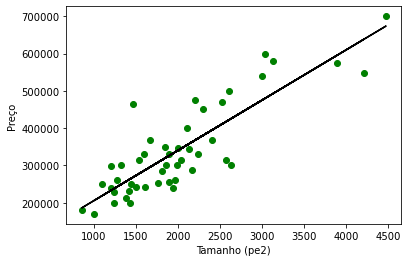

In [11]:
plt.scatter(X, y,color='g') #scatter plots verdes
plt.plot(X, reg.predict(X),color='k') #linha preta
plt.xlabel('Tamanho (pe2)') # label eixo x
plt.ylabel('Preço') #label eixo y

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [12]:
from sklearn.metrics import r2_score

In [13]:
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())

In [14]:
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [15]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))

In [16]:
print(f'rss = {rss}')
print(f'r2 = {r2}')

rss = 193464477600.7059
r2 = 0.6320180251851147


# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?




### Tamanho

In [17]:
X_tam = df_portland[['tamanho']]
y_tam = df_portland[['preco']]

In [18]:
X_quar = df_portland[['quartos']]
y_quar = df_portland[['preco']]

In [19]:
reg_tam = LinearRegression().fit(X_tam,y_tam)
reg_quar = LinearRegression().fit(X_quar,y_quar)

In [20]:
y_hat_tam = reg.predict(X_tam)
y_hat_quar = reg.predict(X_quar)
#print(y_hat_tam)
#print(y_hat_quar)

Text(0, 0.5, 'Preço')

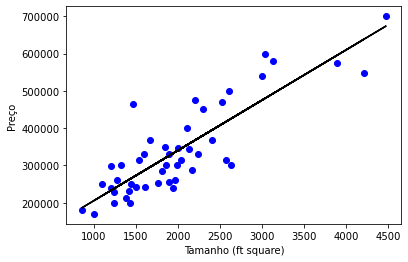

In [21]:
plt.scatter(X_tam, y_tam,color='b') 
plt.plot(X_tam, reg.predict(X_tam),color='black') 
plt.xlabel('Tamanho (ft square)') 
plt.ylabel('Preço') 

Text(0, 0.5, 'Preço')

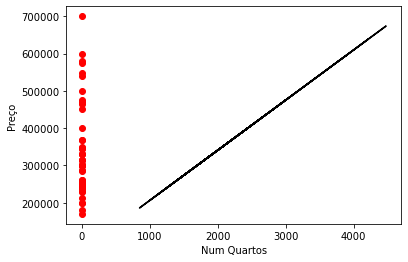

In [22]:
plt.scatter(X_quar, y_quar,color='r') 
plt.plot(X_tam, reg.predict(X_tam),color='black') 
plt.xlabel('Num Quartos') 
plt.ylabel('Preço') 

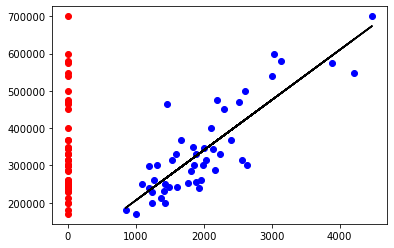

In [23]:
plt.scatter(X_tam, y_tam,color='b') 
plt.plot(X_tam, reg.predict(X_tam),color='black') 
plt.scatter(X_quar, y_quar,color='r') 
plt.plot(X_tam, reg.predict(X_tam),color='black') 

In [24]:
#tamanho
rss_tam = calc_rss(y_tam,reg.predict(X_tam))
r2_tam = calc_r2(y_tam,reg.predict(X_tam))
#quartos
rss_quar = calc_rss(y_quar,reg.predict(X_quar))
r2_quar = calc_r2(y_quar,reg.predict(X_quar))

In [25]:
print("TAMANHO:")
print(f'rss = {rss_tam}')
print(f'r2 = {r2_tam}')
print()
print("QUARTOS:")
print(f'rss = {rss_quar}')
print(f'r2 = {r2_quar}')

TAMANHO:
rss = 193464477600.7059
r2 = 0.6320180251851147

QUARTOS:
rss = 4112470394446.1113
r2 = -8530773.348780483


# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [26]:
X_tv = df_adv[['TV']]
y_tv = df_adv[['sales']]

X_radio = df_adv[['radio']]
y_radio = df_adv[['sales']]

X_newsp = df_adv[['newspaper']]
y_newsp = df_adv[['sales']]

In [27]:
LinearRegression().fit(X_tv,y_tv)

LinearRegression()

In [28]:
LinearRegression().fit(X_radio,y_radio)

LinearRegression()

In [29]:
LinearRegression().fit(X_newsp,y_newsp)

LinearRegression()

In [30]:
y_hat_tv = reg.predict(X_tv)

y_hat_radio = reg.predict(X_radio)

y_hat_quar = reg.predict(X_radio)

Text(0, 0.5, 'Sales')

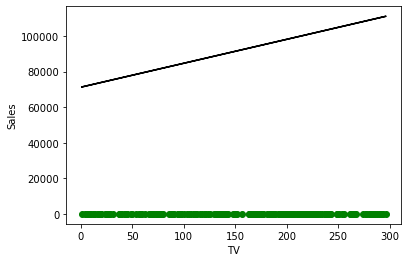

In [31]:
plt.scatter(X_tv, y_tv,color='g') 
plt.plot(X_tv, reg.predict(X_tv),color='black') 
plt.xlabel('TV') 
plt.ylabel('Sales') 

Text(0, 0.5, 'Sales')

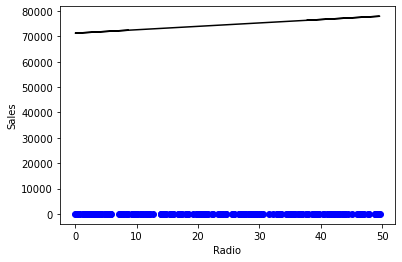

In [32]:
plt.scatter(X_radio, y_radio, color='b') 
plt.plot(X_radio, reg.predict(X_radio),color='black') 
plt.xlabel('Radio') 
plt.ylabel('Sales') 

Text(0, 0.5, 'Sales')

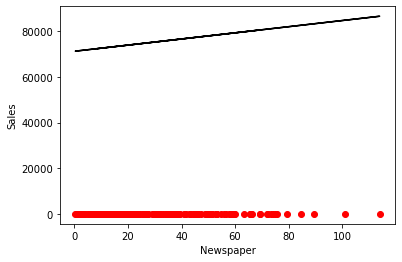

In [33]:
plt.scatter(X_newsp, y_newsp,color='r') 
plt.plot(X_newsp, reg.predict(X_newsp),color='black') 
plt.xlabel('Newspaper') 
plt.ylabel('Sales') 

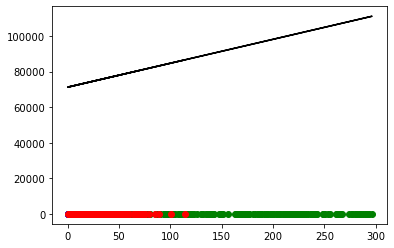

In [34]:
plt.scatter(X_tv, y_tv,color='g') 
plt.plot(X_tv, reg.predict(X_tv),color='black') 
plt.scatter(X_radio, y_radio, color='b') 
plt.plot(X_radio, reg.predict(X_radio),color='black') 
plt.scatter(X_newsp, y_newsp,color='r') 
plt.plot(X_newsp, reg.predict(X_newsp),color='black') 

In [35]:
# tv
rss_tv = calc_rss(y_tv,reg.predict(X_tv))
r2_tv = calc_r2(y_tv,reg.predict(X_tv))
# radio
rss_radio = calc_rss(y_radio,reg.predict(X_radio))
r2_radio = calc_r2(y_radio,reg.predict(X_radio))
# newspaper
rss_newsp = calc_rss(y_newsp,reg.predict(X_newsp))
r2_newsp = calc_r2(y_newsp,reg.predict(X_newsp))

In [36]:
print("TV:")
print(f'rss = {rss_tv}')
print(f'r2 = {r2_tv}')
print()
print("RADIO:")
print(f'rss = {rss_radio}')
print(f'r2 = {r2_radio}')
print()
print("NEWSPAPER:")
print(f'rss = {rss_newsp}')
print(f'r2 = {r2_newsp}')

TV:
rss = 1684088153018.6035
r2 = -62.442520144897266

RADIO:
rss = 1107448815191.798
r2 = -1394.0715238032265

NEWSPAPER:
rss = 1137736319113.8887
r2 = -665.0700998165673


# Exercício 3

1. Compare os resultados das duas regressões com a implemtação do KNN-Regressor visto na aula passada.

1. Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;
    1. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import model_selection as ms

In [38]:
X_adv = df_adv[['TV', 'radio',	'newspaper']]
y_adv = df_adv[['sales']]

In [39]:
splits = ms.train_test_split(X_adv, y_adv, test_size=0.2)
X_adv_train, X_adv_test, y_adv_train, y_adv_test = splits

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler_previsores = scaler.fit(X_adv_train)
X_train = scaler_previsores.transform(X_adv_train)
X_test = scaler_previsores.transform(X_adv_test)

In [43]:
model_adv = KNeighborsRegressor(n_neighbors=3)

In [44]:
model_adv.fit(X_adv_train, y_adv_train)

KNeighborsRegressor(n_neighbors=3)

In [45]:
expected_adv = y_adv_test
predicted_adv = model_adv.predict(X_adv_test)

In [46]:
print ("Dados de teste")
print ("MSE: " + str(metrics.mean_squared_error(expected_adv, predicted_adv)))
print ("R2: " + str(metrics.r2_score(expected_adv, predicted_adv)))

Dados de teste
MSE: 3.622444444444443
R2: 0.8648681660768871


In [47]:
X_port = df_portland[['tamanho',	'quartos']]
y_port = df_portland[['preco']]

In [48]:
splits = ms.train_test_split(X_port, y_port, test_size=0.2)
X_port_train, X_port_test, y_port_train, y_port_test = splits

In [49]:
scaler_previsores = scaler.fit(X_port_train)
X_port = scaler_previsores.transform(X_port_train)
X_port = scaler_previsores.transform(X_port_test)

In [50]:
model_port = KNeighborsRegressor(n_neighbors=3)

In [51]:
model_port.fit(X_port_train, y_port_train)

KNeighborsRegressor(n_neighbors=3)

In [52]:
expected_port = y_port_test
predicted_port = model_port.predict(X_port_test)

In [54]:
print ("Dados de teste")
print ("MSE: " + str(metrics.mean_squared_error(expected_port, predicted_port)))
print ("R2: " + str(metrics.r2_score(expected_port, predicted_port)))

Dados de teste
MSE: 6786538657.911113
R2: 0.6289151671106881
